In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import uproot
from yahist import Hist1D
from yahist.utils import plot_stack
from matplotlib.ticker import AutoMinorLocator
import os
from os import listdir
from os.path import isfile, join

In [2]:
# matplotlob params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
# functions for reading files
path_to_mc_TTJets = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTJets/"
mc_dirs_TTJets = [f.path for f in os.scandir(path_to_mc_TTJets) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_TTJets = lambda i : [f for f in listdir(mc_dirs_TTJets[i]) if isfile(join(mc_dirs_TTJets[i], f))]
def mc_files_TTJets(i,j):
    return uproot.open(mc_dirs_TTJets[i] + '/' + mc_files_list_TTJets(i)[j]).get("tree").pandas.df(flatten=False)
def mc_nevents_TTJets(i,j):
    return uproot.open(mc_dirs_TTJets[i] + '/' + mc_files_list_TTJets(i)[j]).get("n_events").allvalues[1]

path_to_mc_ST = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/ST/"
mc_dirs_ST = [f.path for f in os.scandir(path_to_mc_ST) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_ST = lambda i : [f for f in listdir(mc_dirs_ST[i]) if isfile(join(mc_dirs_ST[i], f))]
def mc_files_ST(i,j):
    return uproot.open(mc_dirs_ST[i] + '/' + mc_files_list_ST(i)[j]).get("tree").pandas.df(flatten=False)
def mc_nevents_ST(i,j):
    return uproot.open(mc_dirs_ST[i] + '/' + mc_files_list_ST(i)[j]).get("n_events").allvalues[1]

path_to_mc_VV = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/VV/"
mc_dirs_VV = [f.path for f in os.scandir(path_to_mc_VV) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_VV = lambda i : [f for f in listdir(mc_dirs_VV[i]) if isfile(join(mc_dirs_VV[i], f))]
def mc_files_VV(i,j):
    return uproot.open(mc_dirs_VV[i] + '/' + mc_files_list_VV(i)[j]).get("tree").pandas.df(flatten=False)
def mc_nevents_VV(i,j):
    return uproot.open(mc_dirs_VV[i] + '/' + mc_files_list_VV(i)[j]).get("n_events").allvalues[1]

path_to_mc_TTV = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTV/"
mc_dirs_TTV = [f.path for f in os.scandir(path_to_mc_TTV) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_TTV = lambda i : [f for f in listdir(mc_dirs_TTV[i]) if isfile(join(mc_dirs_TTV[i], f))]
def mc_files_TTV(i,j):
    return uproot.open(mc_dirs_TTV[i] + '/' + mc_files_list_TTV(i)[j]).get("tree").pandas.df(flatten=False)
def mc_nevents_TTV(i,j):
    return uproot.open(mc_dirs_TTV[i] + '/' + mc_files_list_TTV(i)[j]).get("n_events").allvalues[1]

path_to_mc_VJets = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/VJets/"
mc_dirs_VJets = [f.path for f in os.scandir(path_to_mc_VJets) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_VJets = lambda i : [f for f in listdir(mc_dirs_VJets[i]) if isfile(join(mc_dirs_VJets[i], f))]
def mc_files_VJets(i,j):
    return uproot.open(mc_dirs_VJets[i] + '/' + mc_files_list_VJets(i)[j]).get("tree").pandas.df(flatten=False)
def mc_nevents_VJets(i,j):
    return uproot.open(mc_dirs_VJets[i] + '/' + mc_files_list_VJets(i)[j]).get("n_events").allvalues[1]

path_to_data = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/MuonEG/"
data_dirs = [f.path for f in os.scandir(path_to_data) if f.is_dir() and 'v5-0-0' in f.path]
data_files_list = lambda i : [f for f in listdir(data_dirs[i]) if isfile(join(data_dirs[i], f))]
def data_files(i,j):
    return uproot.open(data_dirs[i] + '/' + data_files_list(i)[j]).get("tree").pandas.df(flatten=False)

In [4]:
# making list w/ functions above
mc_list_TTJets = [mc_files_TTJets(i,j) for i in range(len(mc_dirs_TTJets)) for j in range(len(mc_files_list_TTJets(i)))]

In [5]:
mc_list_ST = [mc_files_ST(i,j) for i in range(len(mc_dirs_ST)) for j in range(len(mc_files_list_ST(i)))]

In [6]:
mc_list_VV = [mc_files_VV(i,j) for i in range(len(mc_dirs_VV)) for j in range(len(mc_files_list_VV(i)))]

In [7]:
mc_list_TTV = [mc_files_TTV(i,j) for i in range(len(mc_dirs_TTV)) for j in range(len(mc_files_list_TTV(i)))]

In [8]:
mc_list_VJets = [mc_files_VJets(i,j) for i in range(len(mc_dirs_VJets)) for j in range(len(mc_files_list_VJets(i)))]

In [9]:
data_list = [data_files(i,j) for i in range(len(data_dirs)) for j in range(len(data_files_list(i)))]

In [10]:
n_events_list_TTJets = [sum([mc_nevents_TTJets(i,j) for j in range(len(mc_files_list_TTJets(i)))]) for i in range(len(mc_dirs_TTJets))]

In [11]:
n_events_list_ST = [sum([mc_nevents_ST(i,j) for j in range(len(mc_files_list_ST(i)))]) for i in range(len(mc_dirs_ST))]

In [12]:
n_events_list_VV = [sum([mc_nevents_VV(i,j) for j in range(len(mc_files_list_VV(i)))]) for i in range(len(mc_dirs_VV))]

In [13]:
n_events_list_TTV = [sum([mc_nevents_TTV(i,j) for j in range(len(mc_files_list_TTV(i)))]) for i in range(len(mc_dirs_TTV))]

In [14]:
n_events_list_VJets = [sum([mc_nevents_VJets(i,j) for j in range(len(mc_files_list_VJets(i)))]) for i in range(len(mc_dirs_VJets))]

In [15]:
# Add xsec & n_events branch TTJets
a = len(mc_files_list_TTJets(0))
b = a + len(mc_files_list_TTJets(1))
c = len(mc_list_TTJets)

for i in range(a):
    mc_list_TTJets[i].insert(1,'xsec',87.3)
    mc_list_TTJets[i].insert(2,'n_events',n_events_list_TTJets[0])
for i in range(a, b):
    mc_list_TTJets[i].insert(1,'xsec',182.7)
    mc_list_TTJets[i].insert(2,'n_events',n_events_list_TTJets[1])
for i in range(b, c):
    mc_list_TTJets[i].insert(1,'xsec',182.7)
    mc_list_TTJets[i].insert(2,'n_events',n_events_list_TTJets[2])

In [16]:
# ST
a = len(mc_files_list_ST(0))
b = a + len(mc_files_list_ST(1))
c = b + len(mc_files_list_ST(2))
d = c + len(mc_files_list_ST(3))
e = len(mc_list_ST)

for i in range(a):
    mc_list_ST[i].insert(1,'xsec',3.7)
    mc_list_ST[i].insert(2,'n_events',n_events_list_ST[0])
for i in range(a,b):
    mc_list_ST[i].insert(1,'xsec',80.95)
    mc_list_ST[i].insert(2,'n_events',n_events_list_ST[1])
for i in range(b,c):
    mc_list_ST[i].insert(1,'xsec',136.02)
    mc_list_ST[i].insert(2,'n_events',n_events_list_ST[2])
for i in range(c,d):
    mc_list_ST[i].insert(1,'xsec',19.6)
    mc_list_ST[i].insert(2,'n_events',n_events_list_ST[3])
for i in range(d,e):
    mc_list_ST[i].insert(1,'xsec',19.6)
    mc_list_ST[i].insert(2,'n_events',n_events_list_ST[4])

In [17]:
# VV
a = len(mc_files_list_VV(0))
b = a + len(mc_files_list_VV(1))
c = b + len(mc_files_list_VV(2))
d = c + len(mc_files_list_VV(3))
e = d + len(mc_files_list_VV(4))
f = e + len(mc_files_list_VV(5))
g = f + len(mc_files_list_VV(6))
h = g + len(mc_files_list_VV(7))
j = h + len(mc_files_list_VV(8))
k = j + len(mc_files_list_VV(9))

for i in range(a):
    mc_list_VV[i].insert(1,'xsec',12.18)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[0])
for i in range(a,b):
    mc_list_VV[i].insert(1,'xsec',50.00)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[1])
for i in range(b,c):
    mc_list_VV[i].insert(1,'xsec',10.74)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[2])
for i in range(c,d):
    mc_list_VV[i].insert(1,'xsec',3.05)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[3])
for i in range(d,e):
    mc_list_VV[i].insert(1,'xsec',5.60)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[4])
for i in range(e,f):
    mc_list_VV[i].insert(1,'xsec',4.43)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[5])
for i in range(f,g):
    mc_list_VV[i].insert(1,'xsec',0.56)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[6])
for i in range(g,h):
    mc_list_VV[i].insert(1,'xsec',3.22)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[7])
for i in range(h,j):
    mc_list_VV[i].insert(1,'xsec',4.73)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[8])
for i in range(j,k):
    mc_list_VV[i].insert(1,'xsec',1.25)
    mc_list_VV[i].insert(2,'n_events',n_events_list_VV[9])

In [18]:
# TTV
a = len(mc_files_list_TTV(0))
b = a + len(mc_files_list_TTV(1))
c = b + len(mc_files_list_TTV(2))
d = c + len(mc_files_list_TTV(3))

for i in range(a):
    mc_list_TTV[i].insert(1,'xsec',0.20)
    mc_list_TTV[i].insert(2,'n_events',n_events_list_TTV[0])
for i in range(a,b):
    mc_list_TTV[i].insert(1,'xsec',0.40)
    mc_list_TTV[i].insert(2,'n_events',n_events_list_TTV[1])
for i in range(b,c):
    mc_list_TTV[i].insert(1,'xsec',0.25)
    mc_list_TTV[i].insert(2,'n_events',n_events_list_TTV[2])
for i in range(c,d):
    mc_list_TTV[i].insert(1,'xsec',0.53)
    mc_list_TTV[i].insert(2,'n_events',n_events_list_TTV[3])

In [19]:
# VJets
a = len(mc_files_list_VJets(0))
b = a + len(mc_files_list_VJets(1))
c = b + len(mc_files_list_VJets(2))
d = c + len(mc_files_list_VJets(3))
e = d + len(mc_files_list_VJets(4))
f = e + len(mc_files_list_VJets(5))
g = f + len(mc_files_list_VJets(6))
h = g + len(mc_files_list_VJets(7))
j = h + len(mc_files_list_VJets(8))

for i in range(a):
    mc_list_VJets[i].insert(1,'xsec',6021)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[0])
for i in range(a,b):
    mc_list_VJets[i].insert(1,'xsec',2.36)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[1])
for i in range(b,c):
    mc_list_VJets[i].insert(1,'xsec',11752)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[2])
for i in range(c,d):
    mc_list_VJets[i].insert(1,'xsec',4.95)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[3])
for i in range(d,e):
    mc_list_VJets[i].insert(1,'xsec',3841)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[4])
for i in range(e,f):
    mc_list_VJets[i].insert(1,'xsec',4.94)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[5])
for i in range(f,g):
    mc_list_VJets[i].insert(1,'xsec',1160)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[6])
for i in range(g,h):
    mc_list_VJets[i].insert(1,'xsec',8.83)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[7])
for i in range(h,j):
    mc_list_VJets[i].insert(1,'xsec',600)
    mc_list_VJets[i].insert(2,'n_events',n_events_list_VJets[8])

In [20]:
# concat to make df
mc_c_TTJets = pandas.concat(mc_list_TTJets)
mc_c_ST = pandas.concat(mc_list_ST)
mc_c_VV = pandas.concat(mc_list_VV)
mc_c_TTV = pandas.concat(mc_list_TTV)
mc_c_VJets = pandas.concat(mc_list_VJets)
data_c = pandas.concat(data_list)

In [21]:
#mc_c = mc[mc['num_btags_tight'] >= 2]
#data_c = data[data['num_btags_tight'] >= 2] 

In [22]:
xsec_weight_TTJets = mc_c_TTJets.gen_weight * mc_c_TTJets.xsec * 35920 / mc_c_TTJets.n_events
comb_w_TTJets = mc_c_TTJets.mc_weight * mc_c_TTJets.mc_tight_btag_weight * xsec_weight_TTJets

In [23]:
xsec_weight_ST = mc_c_ST.gen_weight * mc_c_ST.xsec * 35920 / mc_c_ST.n_events
comb_w_ST = mc_c_ST.mc_weight * mc_c_ST.mc_tight_btag_weight * xsec_weight_ST

In [24]:
xsec_weight_VV = mc_c_VV.gen_weight * mc_c_VV.xsec * 35920 / mc_c_VV.n_events
comb_w_VV = mc_c_VV.mc_weight * mc_c_VV.mc_tight_btag_weight * xsec_weight_VV

In [25]:
xsec_weight_TTV = mc_c_TTV.gen_weight * mc_c_TTV.xsec * 35920 / mc_c_TTV.n_events
comb_w_TTV = mc_c_TTV.mc_weight * mc_c_TTV.mc_tight_btag_weight * xsec_weight_TTV

In [26]:
xsec_weight_VJets = mc_c_VJets.gen_weight * mc_c_VJets.xsec * 35920 / mc_c_VJets.n_events
comb_w_VJets = mc_c_VJets.mc_weight * mc_c_VJets.mc_tight_btag_weight * xsec_weight_VJets

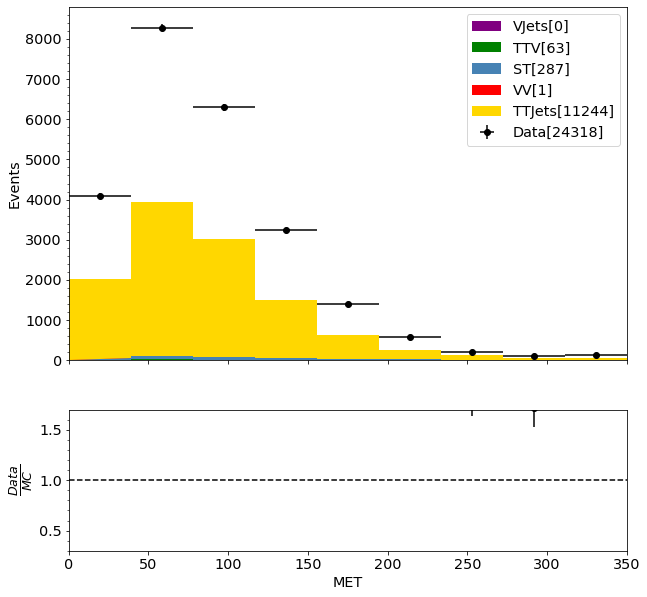

In [27]:
bins = np.linspace(0,350,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.met,weights=comb_w_TTJets,bins=bins,label='TTJets['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_pe_TTJets = Hist1D(mc_c_TTJets.met,weights=comb_w_TTJets,bins=bins,color='orange')
mc_p_ST = Hist1D(mc_c_ST.met,weights=comb_w_ST,bins=bins,label='ST['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.met,weights=comb_w_VV,bins=bins,label='VV['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.met,weights=comb_w_TTV,bins=bins,label='TTV['+str(round(sum(comb_w_TTV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.met,weights=comb_w_VJets,bins=bins,label='VJets['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.met,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,350)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TTV, mc_p_ST, mc_p_VV, mc_p_TTJets], ax=ax1)
#mc_pe_TTJets.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"MET")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_VV+mc_p_TTV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

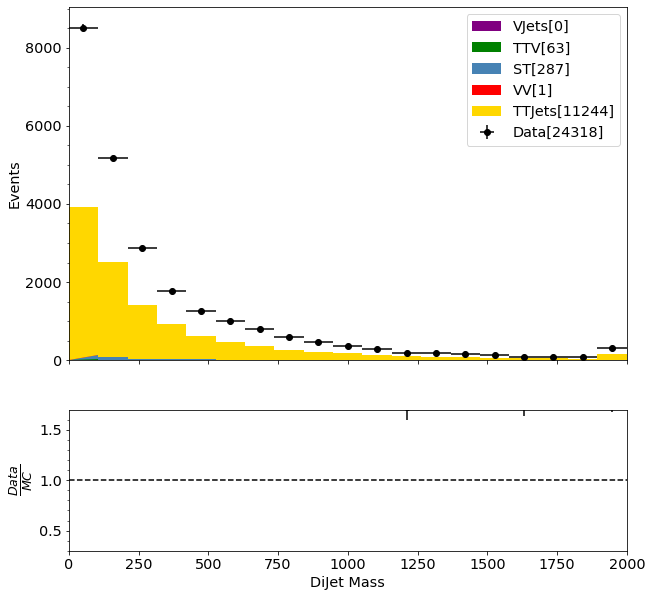

In [28]:
bins = np.linspace(0,2000,20)
mc_p_TTJets = Hist1D(mc_c_TTJets.vbs_dijet_mass,weights=comb_w_TTJets,bins=bins,label='TTJets['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_pe_TTJets = Hist1D(mc_c_TTJets.vbs_dijet_mass,weights=comb_w_TTJets,bins=bins,color='orange')
mc_p_ST = Hist1D(mc_c_ST.vbs_dijet_mass,weights=comb_w_ST,bins=bins,label='ST['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.vbs_dijet_mass,weights=comb_w_VV,bins=bins,label='VV['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.vbs_dijet_mass,weights=comb_w_TTV,bins=bins,label='TTV['+str(round(sum(comb_w_TTV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.vbs_dijet_mass,weights=comb_w_VJets,bins=bins,label='VJets['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.vbs_dijet_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,2000)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TTV, mc_p_ST, mc_p_VV, mc_p_TTJets], ax=ax1)
#mc_pe_TTJets.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"DiJet Mass")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_VV+mc_p_TTV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

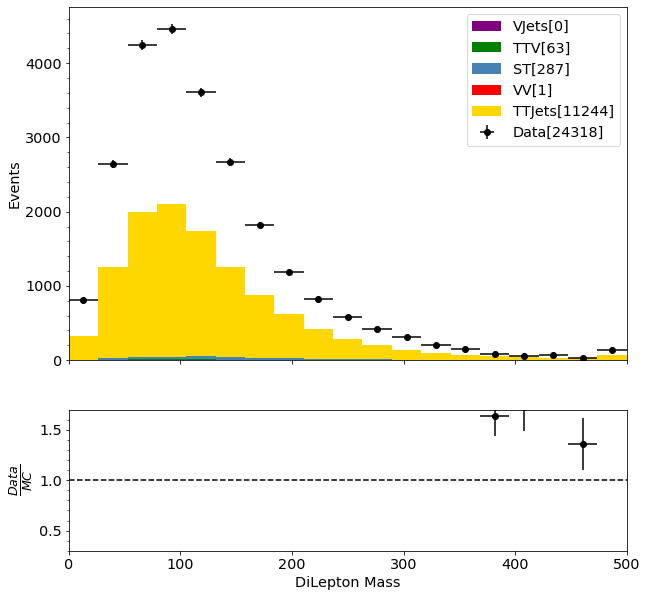

In [29]:
bins = np.linspace(0,500,20)
mc_p_TTJets = Hist1D(mc_c_TTJets.dilep_mass,weights=comb_w_TTJets,bins=bins,label='TTJets['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_pe_TTJets = Hist1D(mc_c_TTJets.dilep_mass,weights=comb_w_TTJets,bins=bins,color='orange')
mc_p_ST = Hist1D(mc_c_ST.dilep_mass,weights=comb_w_ST,bins=bins,label='ST['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.dilep_mass,weights=comb_w_VV,bins=bins,label='VV['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.dilep_mass,weights=comb_w_TTV,bins=bins,label='TTV['+str(round(sum(comb_w_TTV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.dilep_mass,weights=comb_w_VJets,bins=bins,label='VJets['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.dilep_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,500)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TTV, mc_p_ST, mc_p_VV, mc_p_TTJets], ax=ax1)
#mc_pe_TTJets.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"DiLepton Mass")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_VV+mc_p_TTV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

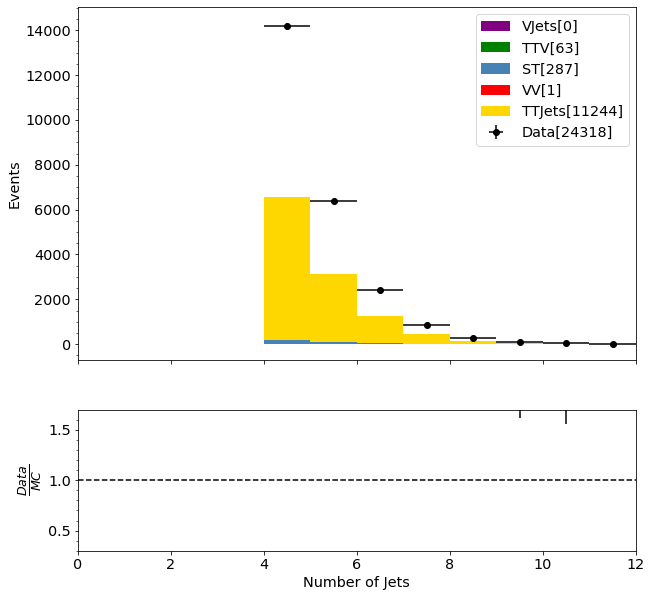

In [30]:
bins = np.linspace(0,12,13)
mc_p_TTJets = Hist1D(mc_c_TTJets.num_jets,weights=comb_w_TTJets,bins=bins,label='TTJets['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_pe_TTJets = Hist1D(mc_c_TTJets.num_jets,weights=comb_w_TTJets,bins=bins,color='orange')
mc_p_ST = Hist1D(mc_c_ST.num_jets,weights=comb_w_ST,bins=bins,label='ST['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.num_jets,weights=comb_w_VV,bins=bins,label='VV['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.num_jets,weights=comb_w_TTV,bins=bins,label='TTV['+str(round(sum(comb_w_TTV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.num_jets,weights=comb_w_VJets,bins=bins,label='VJets['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.num_jets,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,12)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TTV, mc_p_ST, mc_p_VV, mc_p_TTJets], ax=ax1)
#mc_pe_TTJets.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Number of Jets")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_VV+mc_p_TTV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,300,10)
mc_p = Hist1D(mc_c.leading_lep_pt,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_pt,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_pt,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,300)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton Pt")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,200,10)
mc_p = Hist1D(mc_c.trailing_lep_pt,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_pt,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_pt,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)

one_x = np.linspace(0,200)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton Pt")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-3,3,10)
mc_p = Hist1D(mc_c.leading_lep_eta,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_eta,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_eta,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-3,3)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-3,3,10)
mc_p = Hist1D(mc_c.trailing_lep_eta,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_eta,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_eta,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-3,3)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-4,4,10)
mc_p = Hist1D(mc_c.leading_lep_phi,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_phi,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_phi,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-4,4)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-4,4,10)
mc_p = Hist1D(mc_c.trailing_lep_phi,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_phi,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_phi,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-4,4)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')